# <span style="color:red">EDA</span>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'W:\ieee\train.csv')
train.shape

(591239, 17)

In [3]:
print(train.shape)
train.head(7)

(591239, 17)


,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,0,6/22/2021 13:15,59.071225,59.117203,35.765579,NaN,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,Turbine_01,48.670906
1,1,11/6/2021 17:40,258.278976,253.123637,33.392501,789.391492,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,Turbine_97,47.779032
2,2,12/23/2021 21:08,234.884260,236.785260,33.320189,NaN,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,Turbine_158,45.542946
3,3,1/2/2021 16:01,50.535151,37.784692,NaN,NaN,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,Turbine_20,47.515691
4,4,12/6/2021 17:46,247.842835,241.342895,32.897556,NaN,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,Turbine_20,44.625755
5,5,8/6/2021 22:14,247.765556,241.395289,30.008297,NaN,64.581224,422.566167,29.799967,34.929757,86.178932,101.908197,50.421850,4.878976,0.636637,Turbine_20,47.018942
6,6,2/12/2021 6:48,1.267379,12.429282,22.531283,748.809204,48.674368,18.814506,33.224883,30.312056,-0.162132,0.397355,70.781200,3.733328,0.297033,Turbine_120,45.807545


### <span style="color:chocolate">split the data into train, val and test split</span>

In [4]:
X_train, y_train = train.drop('Target', 1), train['Target']

In [5]:
print(X_train.shape)
y_train.shape

(591239, 16)


(591239,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [7]:
print(f'Training data size: x={X_train.shape}, y={y_train.shape}')
print(f'testing data size: x={X_test.shape}, y={y_test.shape}')

Training data size: x=(443429, 16), y=(443429,)
testing data size: x=(147810, 16), y=(147810,)


### <span style="color:chocolate">inspect the statistics and seperate the categorical from the numerical data</span>

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443429 entries, 318454 to 556899
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      443429 non-null  int64  
 1   timestamp                               443429 non-null  object 
 2   active_power_calculated_by_converter    443422 non-null  float64
 3   active_power_raw                        443415 non-null  float64
 4   ambient_temperature                     436061 non-null  float64
 5   generator_speed                         205628 non-null  float64
 6   generator_winding_temp_max              443428 non-null  float64
 7   grid_power10min_average                 443403 non-null  float64
 8   nc1_inside_temp                         443255 non-null  float64
 9   nacelle_temp                            443259 non-null  float64
 10  reactice_power_calculated_by_converter 

In [9]:
categorical_train = X_train.select_dtypes(object)
numerical_train = X_train.select_dtypes(None, object)

categorical_train.head(6)

,timestamp,turbine_id
318454,1/29/2021 21:16,Turbine_108
506486,7/21/2021 5:55,Turbine_123
151440,4/13/2021 22:50,Turbine_10
557470,4/5/2021 5:14,Turbine_20
394126,3/30/2021 20:55,Turbine_19
392427,7/19/2021 11:52,Turbine_10


In [10]:
categorical_train['turbine_id'].nunique()

16

In [11]:
num_of_each_turbine = categorical_train['turbine_id'].value_counts()
num_of_each_turbine

Turbine_15     28389
Turbine_18     28340
Turbine_120    28239
Turbine_97     28101
Turbine_158    28011
Turbine_105    27973
Turbine_108    27960
Turbine_14     27939
Turbine_139    27784
Turbine_103    27663
Turbine_20     27586
Turbine_13     27516
Turbine_123    27436
Turbine_19     27370
Turbine_10     26763
Turbine_01     26356
Name: turbine_id, dtype: int64

In [12]:
categorical_train.isna().sum()

timestamp     0
turbine_id    3
dtype: int64

In [13]:
numerical_train.head(6)

,id,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
318454,318454,406.436264,412.638473,29.198123,919.470276,53.517218,391.884849,32.281866,29.022938,102.142179,114.398930,271.759079,5.802571,0.479514
506486,506486,1336.034220,1359.442851,15.656301,1197.347961,79.190746,1411.425313,31.099452,32.439709,249.384000,292.337003,214.904475,8.915756,0.914020
151440,151440,460.395732,473.232768,28.343602,962.440765,61.351006,467.892731,28.216170,33.411203,95.733803,119.794019,12.664304,7.082214,0.475833
557470,557470,487.185750,494.948436,34.026375,977.089844,63.173875,480.981262,33.906078,30.239692,93.741893,120.647100,33.682317,6.149923,0.431407
394126,394126,975.267770,996.464539,17.505084,NaN,68.281363,910.642971,38.905749,34.577015,174.817145,195.052359,247.899575,7.816220,0.625084
392427,392427,1962.711772,1894.623897,36.037333,NaN,85.102470,1852.611145,35.784852,35.064018,412.144257,485.898056,350.306793,11.263573,1.339883


In [14]:
numerical_train.isna().sum().sort_values(ascending=False)

generator_speed                           237801
ambient_temperature                         7368
nc1_inside_temp                              174
nacelle_temp                                 170
grid_power10min_average                       26
active_power_raw                              14
wind_speed_turbulence                         11
active_power_calculated_by_converter           7
wind_direction_raw                             4
reactice_power_calculated_by_converter         2
generator_winding_temp_max                     1
reactive_power                                 1
id                                             0
wind_speed_raw                                 0
dtype: int64

In [15]:
numerical_train.drop('id', 1).describe().T

,count,mean,std,min,25%,50%,75%,max
active_power_calculated_by_converter,443422.0,526.358116,475.163916,2.620000e-05,149.546362,380.399338,782.099124,1999.999858
active_power_raw,443415.0,538.102528,482.893298,8.440000e-06,155.816784,384.333959,800.878952,1999.951090
ambient_temperature,436061.0,25.578105,8.027367,5.616541e+00,17.093870,27.925721,32.175349,47.940849
generator_speed,205628.0,933.292814,193.378486,8.510000e-08,817.903758,939.002319,1075.482381,1267.140625
generator_winding_temp_max,443428.0,60.733275,9.729371,2.563637e+01,54.921373,60.039878,65.740993,129.846405
grid_power10min_average,443403.0,528.065668,473.136000,4.868490e-04,147.191860,391.685567,795.350138,1999.985311
nc1_inside_temp,443255.0,31.756547,3.923913,1.121315e+01,29.913387,31.763156,33.472247,52.514065
nacelle_temp,443259.0,31.687685,3.552972,1.601022e+01,30.266581,31.962203,33.547493,48.391915
reactice_power_calculated_by_converter,443427.0,111.105442,78.351737,-3.183937e+02,81.497753,92.041995,124.896644,523.892695
reactive_power,443428.0,133.735352,91.367750,-5.305059e+00,96.042740,107.665400,154.187792,592.815938


In [16]:
print('\t'*5 +' ', len(numerical_train))
numerical_train.nunique().sort_values(ascending=False)

					  443429


id                                        443429
active_power_calculated_by_converter      443169
active_power_raw                          443161
grid_power10min_average                   443108
wind_speed_turbulence                     442775
reactice_power_calculated_by_converter    442487
wind_direction_raw                        442427
reactive_power                            442033
generator_winding_temp_max                441660
nc1_inside_temp                           437964
nacelle_temp                              437111
ambient_temperature                       434200
wind_speed_raw                            417564
generator_speed                            66122
dtype: int64

### <span style="color:chocolate">data visualization</span>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Turbine_108'),
  Text(1, 0, 'Turbine_123'),
  Text(2, 0, 'Turbine_10'),
  Text(3, 0, 'Turbine_20'),
  Text(4, 0, 'Turbine_19'),
  Text(5, 0, 'Turbine_158'),
  Text(6, 0, 'Turbine_120'),
  Text(7, 0, 'Turbine_15'),
  Text(8, 0, 'Turbine_01'),
  Text(9, 0, 'Turbine_13'),
  Text(10, 0, 'Turbine_103'),
  Text(11, 0, 'Turbine_105'),
  Text(12, 0, 'Turbine_18'),
  Text(13, 0, 'Turbine_14'),
  Text(14, 0, 'Turbine_97'),
  Text(15, 0, 'Turbine_139')])

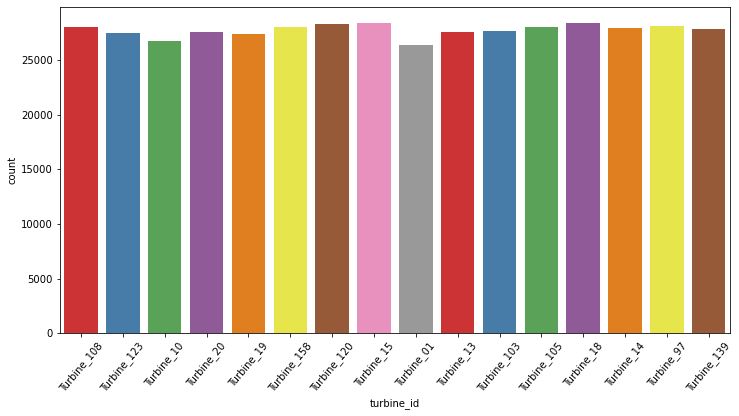

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data = categorical_train, x = 'turbine_id', palette='Set1')
plt.xticks(rotation = 50)

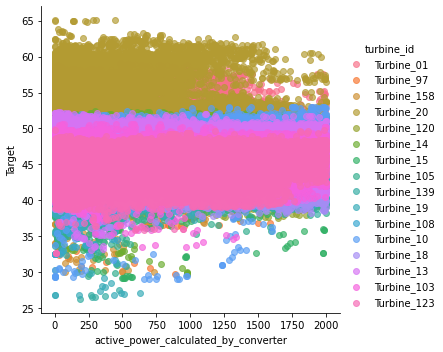

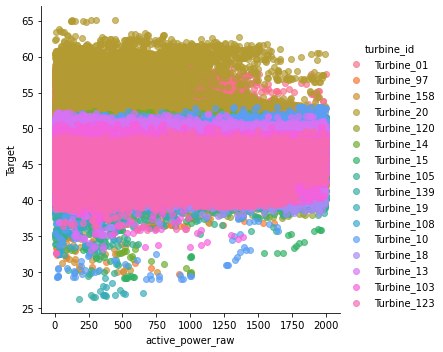

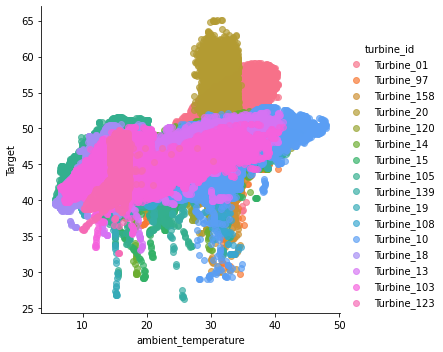

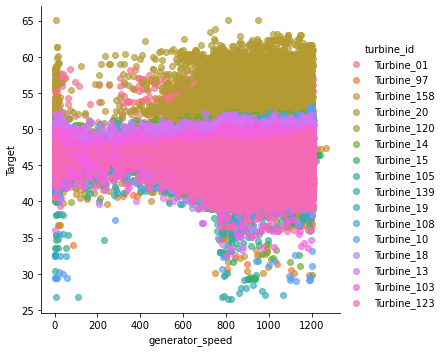

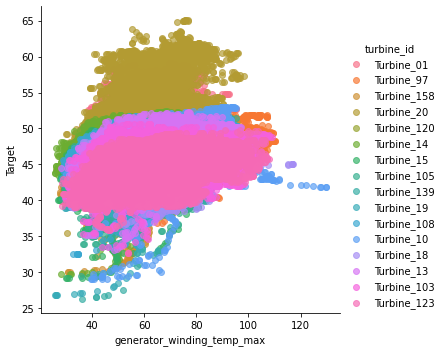

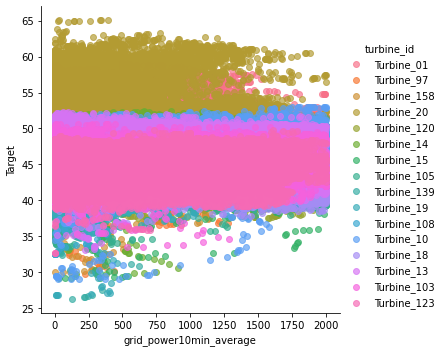

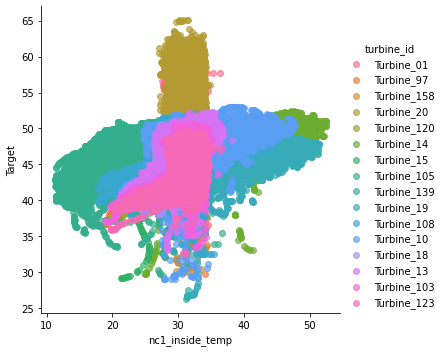

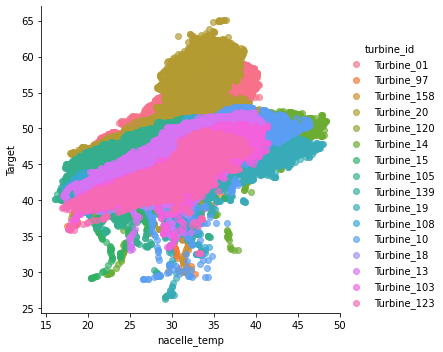

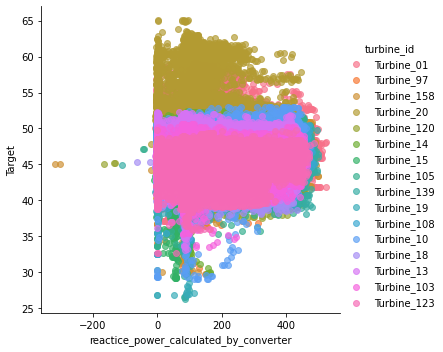

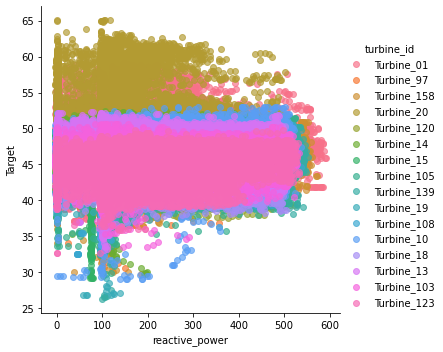

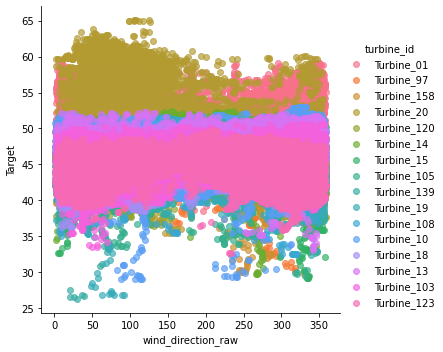

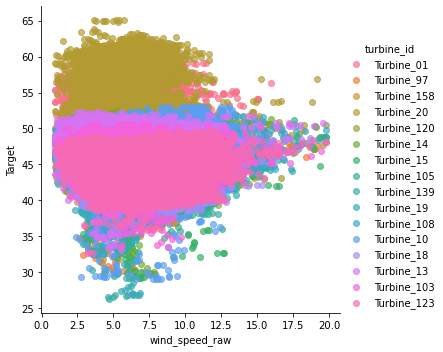

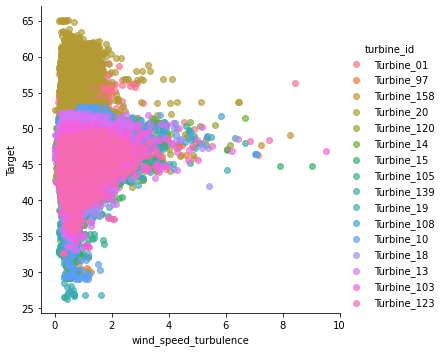

In [18]:
for col in train.columns:
    if col not in ['id', 'timestamp', 'Target', 'turbine_id']:
        sns.lmplot(x=col, y="Target", data=train, hue='turbine_id',
                   fit_reg=False, scatter_kws={'alpha':0.68})
        plt.show()

In [19]:
train.columns

Index(['id', 'timestamp', 'active_power_calculated_by_converter',
       'active_power_raw', 'ambient_temperature', 'generator_speed',
       'generator_winding_temp_max', 'grid_power10min_average',
       'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

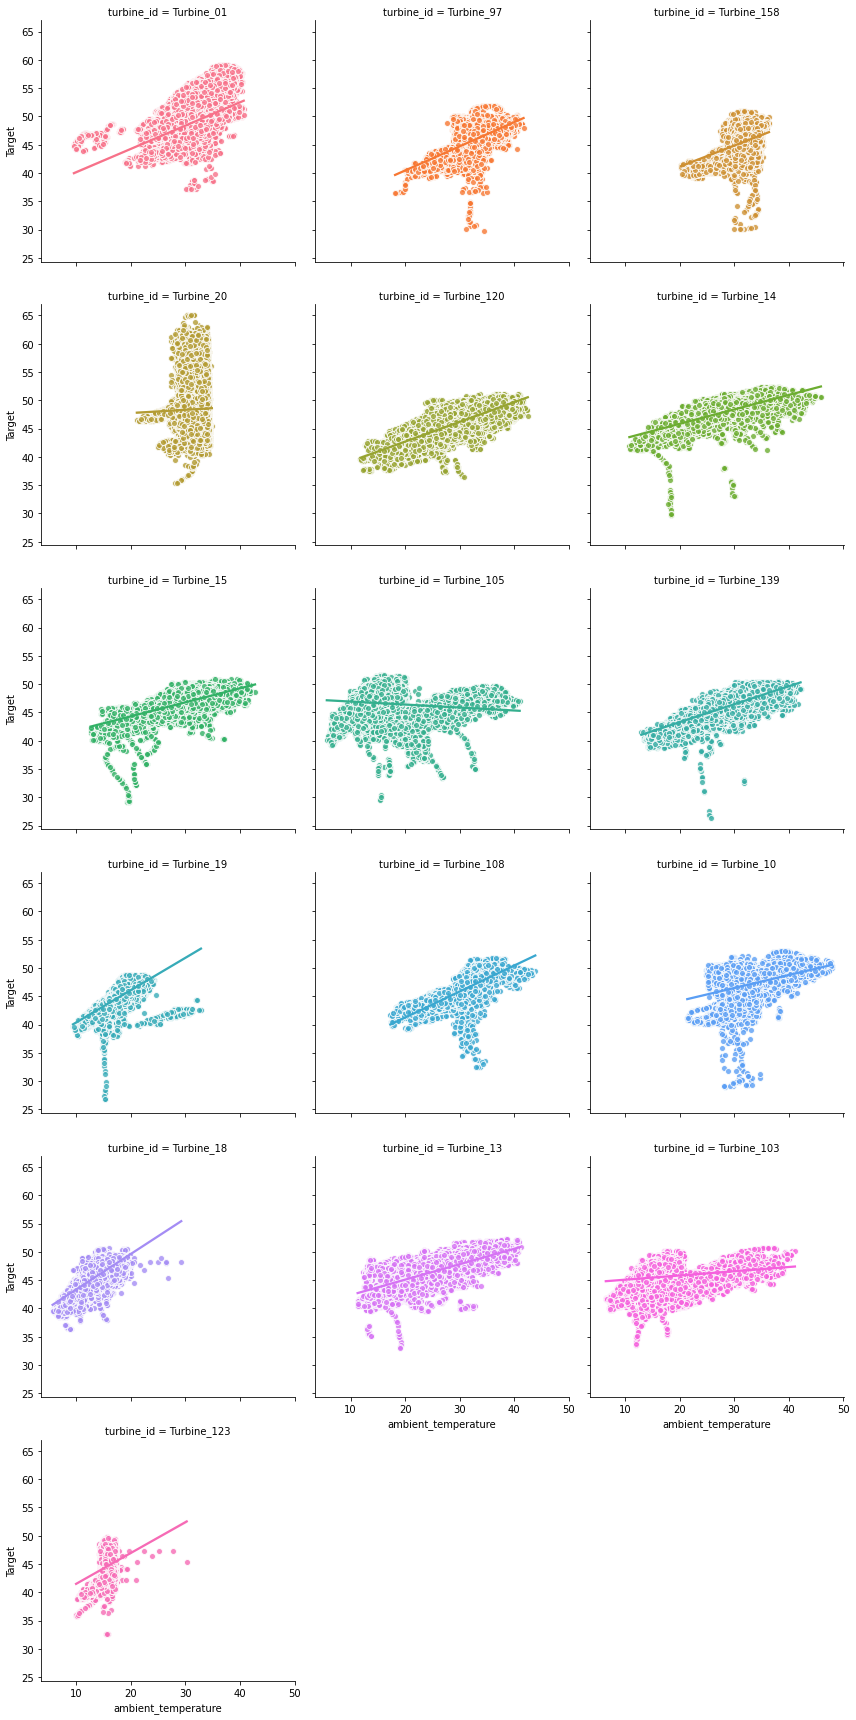

In [20]:
sns.lmplot(
    x='ambient_temperature', y="Target", hue="turbine_id", col="turbine_id",
    data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

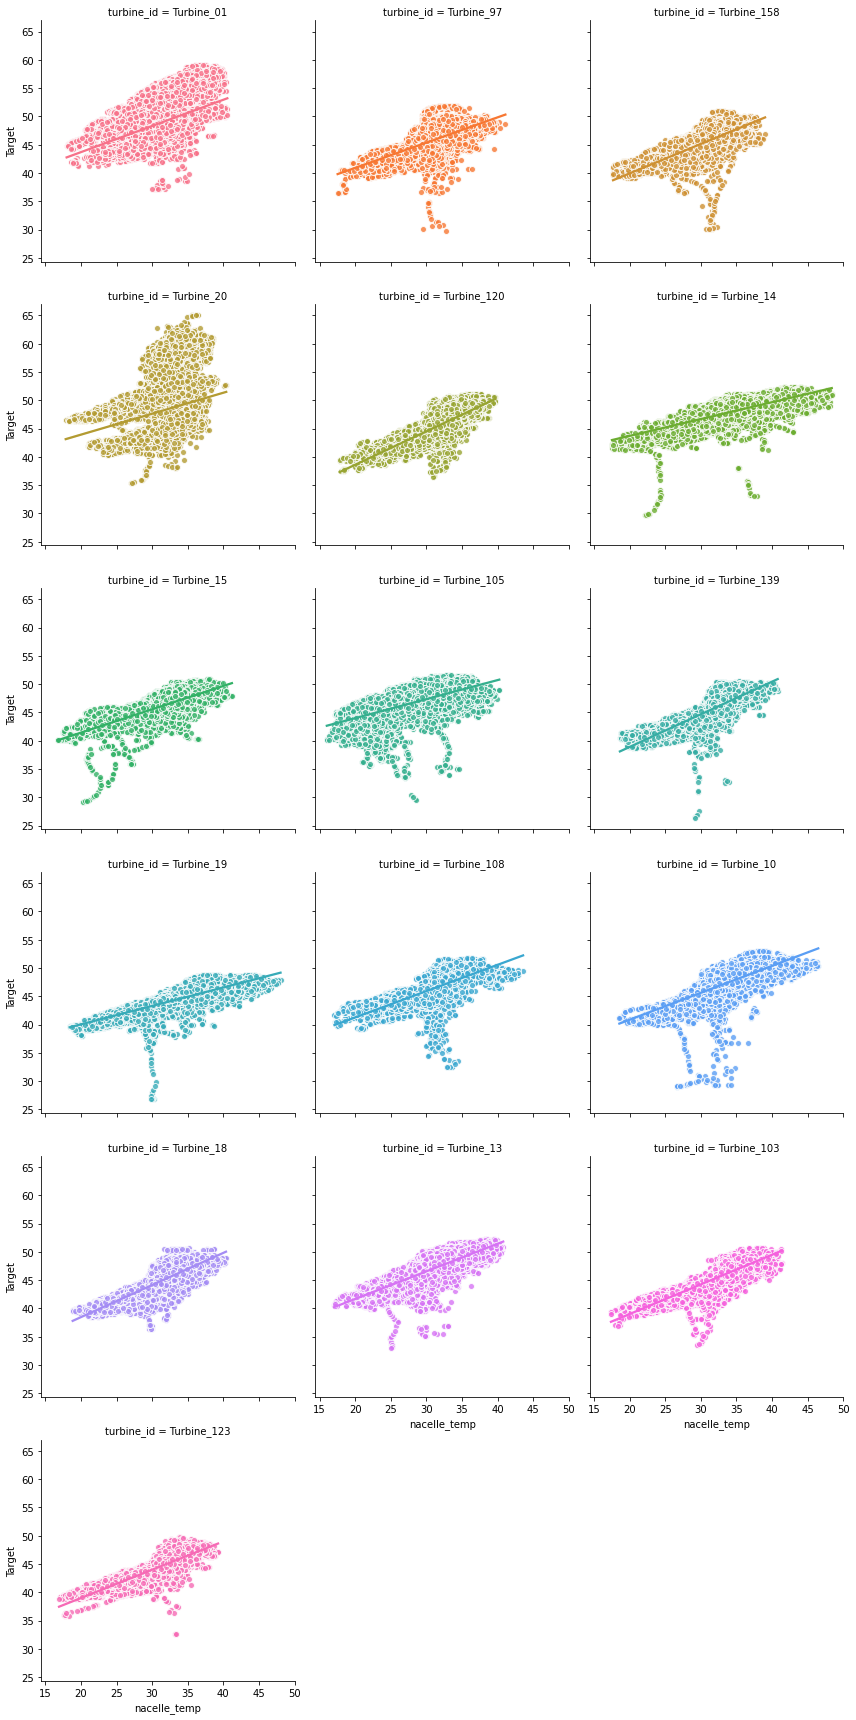

In [21]:
sns.lmplot(
    x='nacelle_temp', y="Target", hue="turbine_id", col="turbine_id",
    data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

# <span style="color:red">Data preparation</span>

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
categorical_train1 = categorical_train.dropna()

In [24]:
numerical_train1 = numerical_train.drop('id', 1)
numerical_train1 = numerical_train1.loc[categorical_train1.index]
'id' in numerical_train1.columns

False

In [25]:
groubed_num_train = numerical_train1.groupby(categorical_train['turbine_id']).mean().T
groubed_num_train

turbine_id,Turbine_01,Turbine_10,Turbine_103,Turbine_105,Turbine_108,Turbine_120,Turbine_123,Turbine_13,Turbine_139,Turbine_14,Turbine_15,Turbine_158,Turbine_18,Turbine_19,Turbine_20,Turbine_97
active_power_calculated_by_converter,434.768705,523.182189,525.316562,545.924442,536.767814,509.237869,530.060422,476.243410,566.218015,533.346067,564.129402,548.852350,548.572285,489.416434,492.896927,588.639436
active_power_raw,448.360507,535.040667,540.201277,557.307768,546.499241,518.324161,537.345916,486.572427,577.862132,544.002502,582.339346,563.817192,561.923573,500.181169,503.952639,597.679784
ambient_temperature,32.226334,33.156670,16.903727,16.421953,31.510527,28.053202,15.728034,26.457100,27.482861,27.368760,28.337110,31.925821,12.878963,17.103686,31.515091,32.624455
generator_speed,923.927209,940.169281,908.477653,935.671998,937.589135,928.900471,955.778945,912.744845,925.724264,934.689531,923.075859,927.344367,941.324045,923.260192,928.354665,967.414020
generator_winding_temp_max,61.741393,61.600566,58.332883,62.193154,59.611247,59.873507,59.175711,63.770270,62.782951,56.839065,59.362034,57.576420,60.895614,61.792696,65.029269,61.362597
grid_power10min_average,440.041709,525.951302,529.617258,546.795571,537.867812,507.799661,525.885283,474.473409,567.722046,535.750616,571.968609,554.176029,552.198298,488.928386,492.348485,589.301728
nc1_inside_temp,31.534515,32.941485,31.993984,24.821875,31.116605,31.299209,31.261028,30.514910,31.276150,36.882961,31.952455,31.770145,30.376210,37.041285,31.309741,32.150840
nacelle_temp,32.117224,33.286128,32.568499,27.702121,31.357832,31.681806,31.291703,30.606041,31.712511,33.464852,32.009195,30.819849,31.842020,33.519601,32.100026,31.047437
reactice_power_calculated_by_converter,90.720223,118.851444,117.356699,121.419002,123.540178,116.149362,116.985009,107.818394,127.254257,118.430069,50.221979,98.884676,116.727064,112.640046,110.935601,129.909716
reactive_power,113.600280,140.607060,141.989641,144.419417,143.318525,137.951426,140.101825,131.251193,150.174617,141.188550,68.446310,124.557690,143.938609,132.585844,133.397783,152.364287


In [26]:
list(groubed_num_train)

['Turbine_01',
 'Turbine_10',
 'Turbine_103',
 'Turbine_105',
 'Turbine_108',
 'Turbine_120',
 'Turbine_123',
 'Turbine_13',
 'Turbine_139',
 'Turbine_14',
 'Turbine_15',
 'Turbine_158',
 'Turbine_18',
 'Turbine_19',
 'Turbine_20',
 'Turbine_97']

In [27]:
for i in zip(groubed_num_train.index, numerical_train1):
    print(i)

('active_power_calculated_by_converter', 'active_power_calculated_by_converter')
('active_power_raw', 'active_power_raw')
('ambient_temperature', 'ambient_temperature')
('generator_speed', 'generator_speed')
('generator_winding_temp_max', 'generator_winding_temp_max')
('grid_power10min_average', 'grid_power10min_average')
('nc1_inside_temp', 'nc1_inside_temp')
('nacelle_temp', 'nacelle_temp')
('reactice_power_calculated_by_converter', 'reactice_power_calculated_by_converter')
('reactive_power', 'reactive_power')
('wind_direction_raw', 'wind_direction_raw')
('wind_speed_raw', 'wind_speed_raw')
('wind_speed_turbulence', 'wind_speed_turbulence')


### <span style="color:chocolate">fill the nan values</span>

In [28]:
numerical_train2 = numerical_train1.copy()

In [29]:
turbine_id = categorical_train['turbine_id']

In [30]:
for cat in list(groubed_num_train):
    avgs = groubed_num_train[cat]
    filled = numerical_train2[turbine_id==cat].fillna(avgs)
    numerical_train2.loc[filled.index] = filled

In [31]:
numerical_train2.isna().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
dtype: int64

### <span style="color:chocolate">remove the outliers (extreme values)</span>

In [32]:
numerical_train3 = numerical_train2.copy()
X = numerical_train3

In [33]:
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3  = X[col].quantile(0.75)
    IQR = Q3-Q1
    X = X[(Q1-3.7*IQR < X[col]) & (X[col] < Q3+3.7*IQR)]

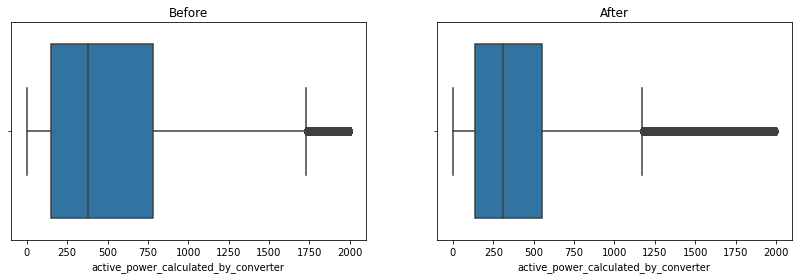

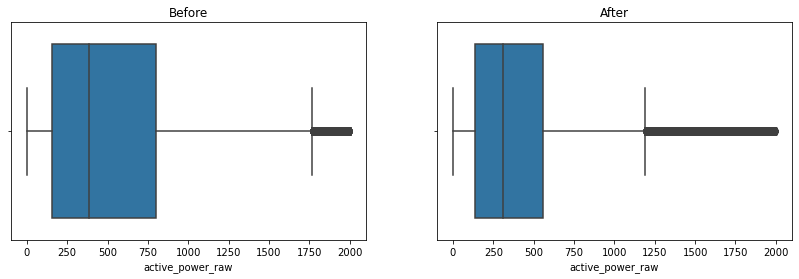

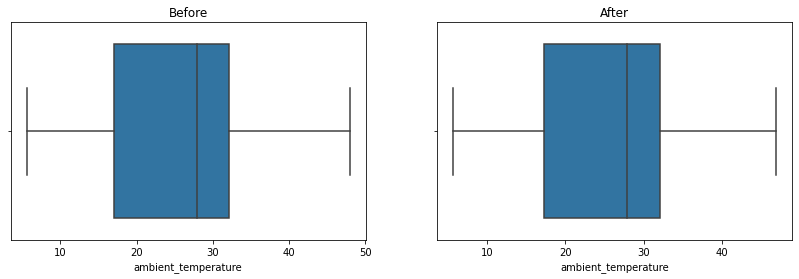

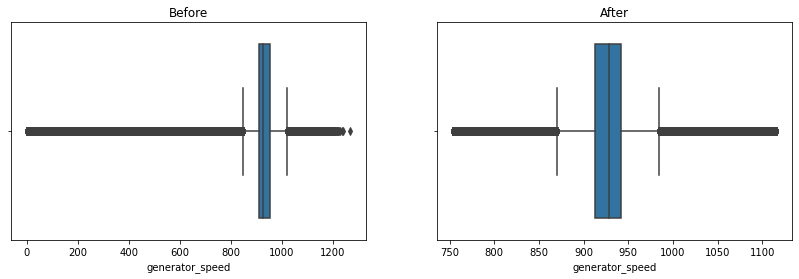

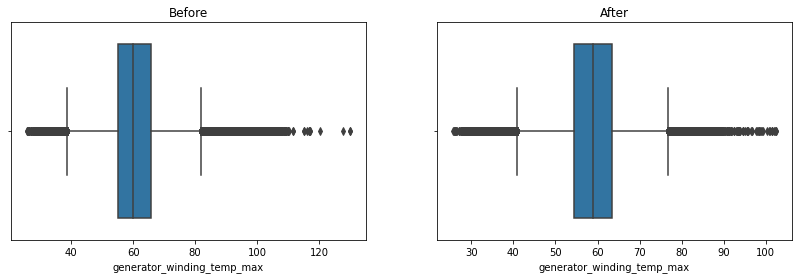

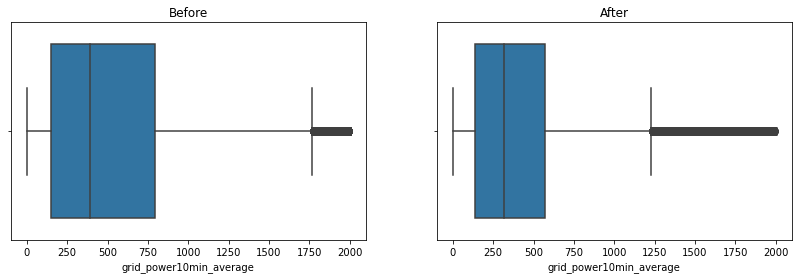

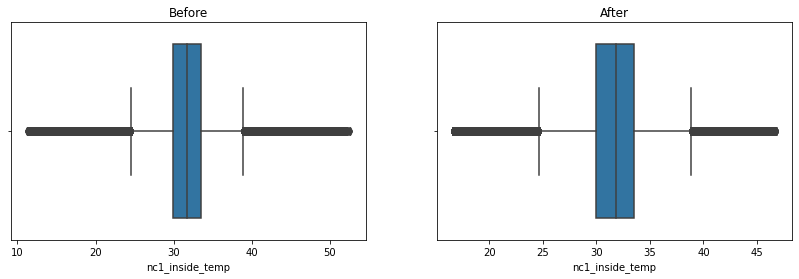

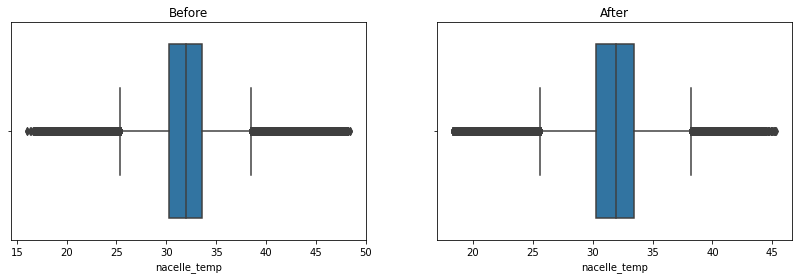

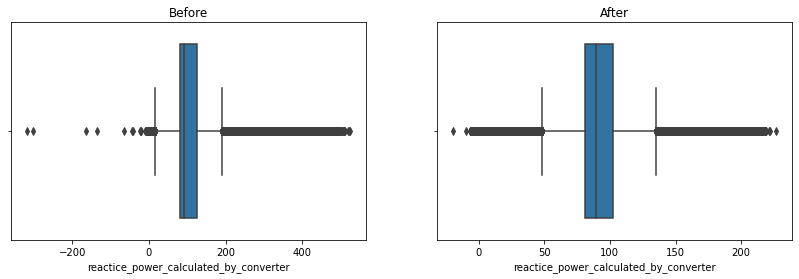

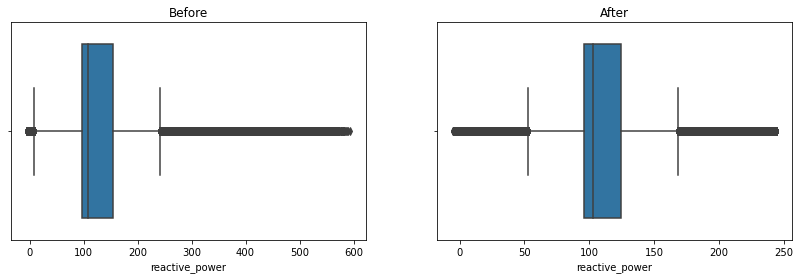

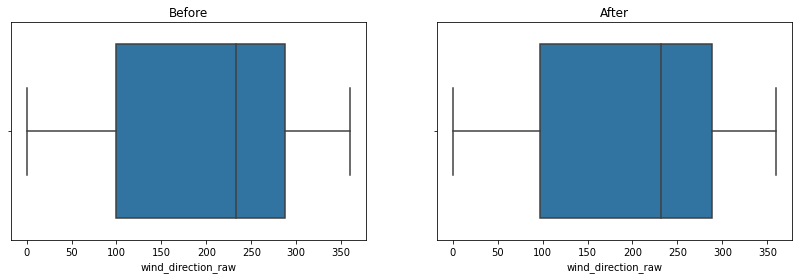

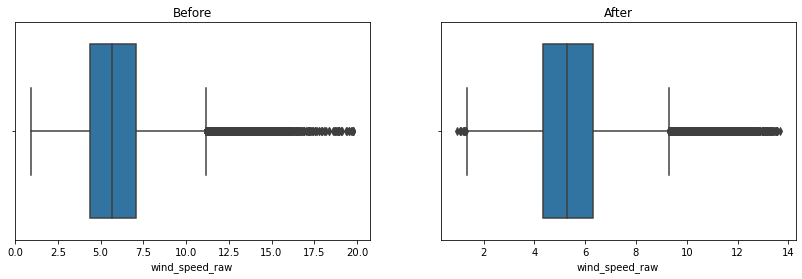

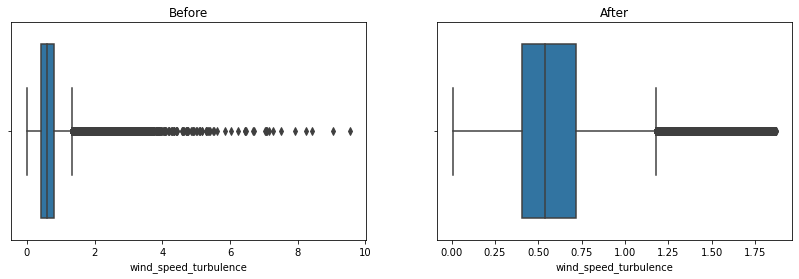

In [34]:
for col in numerical_train2.columns: 
    
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(numerical_train2[col])
    plt.title('Before')

    plt.subplot(1, 2, 2)
    sns.boxplot(X[col])
    plt.title('After')

In [35]:
len(numerical_train2)

443426

In [36]:
numerical_train3 = X
len(X)

342501

In [37]:
len(numerical_train3)

342501

### <span style="color:chocolate">scaling</span>

In [38]:
scale = StandardScaler()
numerical_train3 = scale.fit_transform(numerical_train3)
numerical_train3 = pd.DataFrame(numerical_train3, index=X.index, columns=X.columns)

In [39]:
numerical_train3

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
318454,0.074716,0.073567,0.454653,-0.099213,-0.682376,-0.008335,0.134332,-0.797145,0.337628,0.143592,0.690588,0.269567,-0.427342
151440,0.247575,0.262627,0.346388,0.532207,0.349493,0.221316,-0.993812,0.523867,0.165952,0.264175,-1.763321,1.164700,-0.441979
557470,0.333397,0.330383,1.066376,0.747464,0.589602,0.260861,0.585016,-0.430862,0.112590,0.283242,-1.564257,0.512546,-0.618666
394126,1.896964,1.895169,-1.026815,-0.043523,1.262362,1.559045,1.972318,0.874815,2.284535,1.946242,0.464612,1.678151,0.151600
281992,-0.842029,-0.878515,0.960897,0.016491,-0.749946,-0.992084,0.375837,-0.013717,-0.059753,-0.236622,-0.943280,-1.004772,-1.140828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523548,-0.164318,-0.148836,0.720188,-0.927950,-0.043606,-0.246341,-0.474106,-0.156239,-1.661146,-1.157704,1.041289,0.065997,-0.937430
179643,-1.030061,-1.078723,0.222879,-1.986294,-1.827240,-1.094058,0.820957,-0.170635,-2.335804,-2.379742,0.752673,-1.282656,-0.332272
467400,0.459501,0.462136,0.093861,1.134925,0.627811,0.394205,0.264183,-0.155537,0.026044,0.305332,-1.863979,1.075112,-1.083570
322698,-0.506430,-0.524362,0.847412,0.167031,-0.326644,-0.692943,-0.065902,0.129289,-0.363747,-0.160367,0.950067,-0.236149,-0.167454


### <span style="color:chocolate">categorical transformation</span>

In [40]:
categorical_train2 = categorical_train1.loc[numerical_train3.index]

In [41]:
encoded_turbine_id = pd.get_dummies(categorical_train2['turbine_id'], drop_first=True)
encoded_turbine_id.head()

,Turbine_10,Turbine_103,Turbine_105,Turbine_108,Turbine_120,Turbine_123,Turbine_13,Turbine_139,Turbine_14,Turbine_15,Turbine_158,Turbine_18,Turbine_19,Turbine_20,Turbine_97
318454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
151440,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557470,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
394126,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
281992,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
cleaned_data = numerical_train3.join(encoded_turbine_id)
cleaned_data.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,Turbine_123,Turbine_13,Turbine_139,Turbine_14,Turbine_15,Turbine_158,Turbine_18,Turbine_19,Turbine_20,Turbine_97
318454,0.074716,0.073567,0.454653,-0.099213,-0.682376,-0.008335,0.134332,-0.797145,0.337628,0.143592,...,0,0,0,0,0,0,0,0,0,0
151440,0.247575,0.262627,0.346388,0.532207,0.349493,0.221316,-0.993812,0.523867,0.165952,0.264175,...,0,0,0,0,0,0,0,0,0,0
557470,0.333397,0.330383,1.066376,0.747464,0.589602,0.260861,0.585016,-0.430862,0.112590,0.283242,...,0,0,0,0,0,0,0,0,1,0
394126,1.896964,1.895169,-1.026815,-0.043523,1.262362,1.559045,1.972318,0.874815,2.284535,1.946242,...,0,0,0,0,0,0,0,1,0,0
281992,-0.842029,-0.878515,0.960897,0.016491,-0.749946,-0.992084,0.375837,-0.013717,-0.059753,-0.236622,...,0,0,0,0,0,1,0,0,0,0


In [43]:
y_train = y_train.loc[cleaned_data.index]

### <span style="color:chocolate">date-time data type </span>

In [44]:
categorical_train2 = categorical_train1.loc[cleaned_data.index]

In [45]:
timestamp_col = pd.DatetimeIndex(categorical_train2.timestamp)

In [46]:
time = pd.DataFrame(pd.cut(timestamp_col.hour, [-1, 12, 24],
                           labels=['am', 'pm']))
time.columns = ['Time']

<AxesSubplot:xlabel='Time', ylabel='count'>

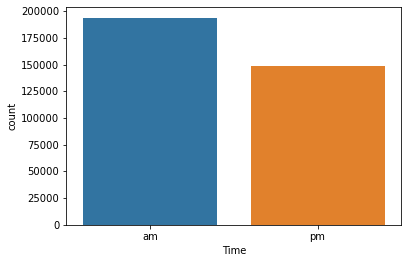

In [47]:
sns.countplot(data = time, x='Time')

In [48]:
pm = pd.get_dummies(time, drop_first=True)

In [49]:
pm.index = cleaned_data.index

In [50]:
cleaned_data = cleaned_data.join(pm)
cleaned_data.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,Turbine_13,Turbine_139,Turbine_14,Turbine_15,Turbine_158,Turbine_18,Turbine_19,Turbine_20,Turbine_97,Time_pm
318454,0.074716,0.073567,0.454653,-0.099213,-0.682376,-0.008335,0.134332,-0.797145,0.337628,0.143592,...,0,0,0,0,0,0,0,0,0,1
151440,0.247575,0.262627,0.346388,0.532207,0.349493,0.221316,-0.993812,0.523867,0.165952,0.264175,...,0,0,0,0,0,0,0,0,0,1
557470,0.333397,0.330383,1.066376,0.747464,0.589602,0.260861,0.585016,-0.430862,0.112590,0.283242,...,0,0,0,0,0,0,0,1,0,0
394126,1.896964,1.895169,-1.026815,-0.043523,1.262362,1.559045,1.972318,0.874815,2.284535,1.946242,...,0,0,0,0,0,0,1,0,0,1
281992,-0.842029,-0.878515,0.960897,0.016491,-0.749946,-0.992084,0.375837,-0.013717,-0.059753,-0.236622,...,0,0,0,0,1,0,0,0,0,1


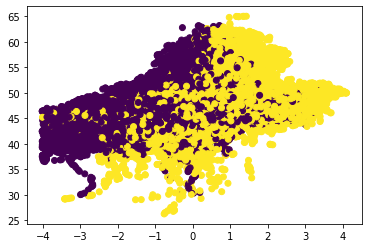

In [51]:
plt.scatter(cleaned_data['nacelle_temp'], y_train, c=pm['Time_pm'])
plt.show()

In [52]:
def moth2season(x):
    if x in [12, 1, 2]: return 'winter'
    elif x in [3, 4, 5]: return 'spring'
    elif x in [6, 7, 8]: return 'summer'
    elif x in [9, 10, 11]: return 'autumn'

In [53]:
season = pd.DataFrame(map(moth2season, timestamp_col.month), columns=['Season'])

<AxesSubplot:xlabel='Season', ylabel='count'>

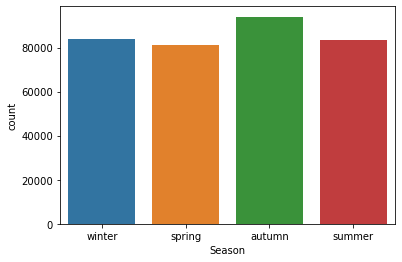

In [54]:
sns.countplot(data = season, x='Season')

In [55]:
num_season = season['Season'].map({'summer':0,
                                 'spring':1,
                                 'winter':2,
                                 'autumn':3})

In [56]:
cat_season = pd.get_dummies(season, drop_first=True)
cat_season.index = cleaned_data.index

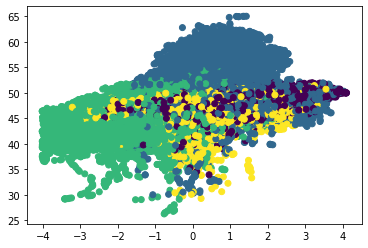

In [57]:
plt.scatter(cleaned_data['nacelle_temp'], y_train, c=num_season)
plt.show()

In [58]:
cleaned_data = cleaned_data.join(cat_season)
cleaned_data.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,Turbine_15,Turbine_158,Turbine_18,Turbine_19,Turbine_20,Turbine_97,Time_pm,Season_spring,Season_summer,Season_winter
318454,0.074716,0.073567,0.454653,-0.099213,-0.682376,-0.008335,0.134332,-0.797145,0.337628,0.143592,...,0,0,0,0,0,0,1,0,0,1
151440,0.247575,0.262627,0.346388,0.532207,0.349493,0.221316,-0.993812,0.523867,0.165952,0.264175,...,0,0,0,0,0,0,1,1,0,0
557470,0.333397,0.330383,1.066376,0.747464,0.589602,0.260861,0.585016,-0.430862,0.112590,0.283242,...,0,0,0,0,1,0,0,1,0,0
394126,1.896964,1.895169,-1.026815,-0.043523,1.262362,1.559045,1.972318,0.874815,2.284535,1.946242,...,0,0,0,1,0,0,1,1,0,0
281992,-0.842029,-0.878515,0.960897,0.016491,-0.749946,-0.992084,0.375837,-0.013717,-0.059753,-0.236622,...,0,1,0,0,0,0,1,0,0,1


In [59]:
cleaned_data.shape

(342501, 32)

In [60]:
cleaned_data.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# <span style="color:red">model building</span>

In [64]:
# from sklearn.linear_model import Ridge, Lasso, LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error as mae

# from sklearn.model_selection import GridSearchCV as search

In [73]:
model = LGBMRegressor(n_estimators = 1204, random_state = 44, max_depth=22, n_jobs=5)
model.fit(cleaned_data, y_train)

LGBMRegressor(max_depth=22, n_estimators=1204, n_jobs=5, random_state=44)

In [74]:
y_pred = model.predict(cleaned_data)
mae(y_train, y_pred)

0.668228576996574

### <span style="color:chocolate">Grid Search</span>

In [ ]:
# params = {'n_estimators':[x for x in range(100, 601, 50)],
#           'max_depth':[d for d in range(4, 30, 2)]}

# model = search(model, params)

# model.fit(cleaned_data, y_train)

# model.best_params_

### <span style="color:chocolate">K Fold</span>

In [ ]:
# fold = KFold(22, shuffle = True, random_state = 44)

# for train_index, test_index in fold.split(cleaned_data, y_train):
    
#     clone_clf = model
    
#     X_train_folds = cleaned_data.loc[train_index]
#     y_train_folds = y_train[train_index]

#     X_test_fold = cleaned_data.loc[test_index]
#     y_test_fold = y_train[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)

#     y_pred = clone_clf.predict(X_test_fold)

#     print(mae(y_test_fold, y_pred))
#     print('*'*11)

# <span style="color:red">inference</span>

In [75]:
def cat_num_split(x):
    categorical_train = x.select_dtypes(object)
    numerical_train = x.select_dtypes(None, object)
    return numerical_train, categorical_train

In [78]:
def prepare(num, cat, y):
    
    cat = cat.dropna()
    
    num = num.drop('id', 1)
    num = num.loc[cat.index]

    for c in list(groubed_num_train):
        avgs = groubed_num_train[c]
        filled = num[cat['turbine_id']==c].fillna(avgs)
        num.loc[filled.index] = filled
        
    for col in num.columns:
        Q1 = num[col].quantile(0.25)
        Q3  = num[col].quantile(0.75)
        IQR = Q3-Q1
        num = num[(Q1-3.7*IQR < num[col]) & (num[col] < Q3+3.7*IQR)]
        
    num_ = scale.transform(num)
    num = pd.DataFrame(num_, index=num.index, columns=num.columns)
    
    cat = cat.loc[num.index]
    
    turbine_id = pd.get_dummies(cat['turbine_id'], drop_first=True)
    turbine_id.index = num.index
    
    num = num.join(turbine_id)
    
    timestamp_col = pd.DatetimeIndex(cat.timestamp)
    time = pd.DataFrame(pd.cut(timestamp_col.hour, [-1, 12, 24], labels=['am', 'pm']))
    time.columns = ['Time']
    
    time = pd.get_dummies(time, drop_first=True)
    time.index = num.index
    num = num.join(time)
    
    season = pd.DataFrame(map(moth2season, timestamp_col.month), columns=['Season'])
    
    season = pd.get_dummies(season, drop_first=True)
    season.index = num.index
    num = num.join(season)
    
    return num, y.loc[num.index]

In [79]:
numerical_train, categorical_train = cat_num_split(X_test)
cleaned_test, y_test = prepare(numerical_train, categorical_train, y_test)

In [80]:
y_pred = model.predict(cleaned_test)

mae(y_test, y_pred)

0.7193939815793409